In [25]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from sklearn.datasets import load_boston

In [26]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=[boston.feature_names])
df['medv'] = pd.Series(boston.target)

In [27]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [29]:
df[-1:]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
505,0.04741,0.0,11.93,0.0,0.573,6.03,80.8,2.505,1.0,273.0,21.0,396.9,7.88,11.9


In [30]:
df[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
df.loc[0:2,['CRIM','ZN','INDUS']]

,CRIM,ZN,INDUS
0,0.00632,18.0,2.31
1,0.02731,0.0,7.07
2,0.02729,0.0,7.07


In [32]:
fdc = df.iloc[:5,:2]

In [33]:
"""
  Lets start with a assumption that there is a class of 300 students and 
  they have given there one fav subject a rating in range of 1-10 from 6 unique subject .
"""
n_studs = 300
HouseOne = pd.DataFrame({
    "Name":["Name_"+str(i) for i in range(n_studs)],
    "Subject":np.random.choice(["Subject_"+str(i) for i in range(6)], size=n_studs),
    "Rating":np.random.uniform(low=1, high=10, size=n_studs)
})

HouseOne.head(5)

,Name,Subject,Rating
0,Name_0,Subject_1,7.876336
1,Name_1,Subject_2,9.287122
2,Name_2,Subject_0,5.953647
3,Name_3,Subject_1,4.840519
4,Name_4,Subject_2,7.949967


In [34]:
"""
Hold on here a second, notice groupby("Subject") will filter you data into groups of each individual unique subject and return a groupby OBJECT.!, 
if you iterate over these objects you get a tuple of group name(here, subname & the filtered data)
"""
for name, group in HouseOne.groupby("Subject"):
  print(name)
  print(group)
  print(f"Group Name is {name}")

Subject_0
         Name    Subject    Rating
2      Name_2  Subject_0  5.953647
8      Name_8  Subject_0  2.985628
10    Name_10  Subject_0  9.890323
26    Name_26  Subject_0  3.891579
40    Name_40  Subject_0  9.378183
50    Name_50  Subject_0  6.594709
54    Name_54  Subject_0  7.357228
71    Name_71  Subject_0  6.015628
77    Name_77  Subject_0  6.992917
80    Name_80  Subject_0  8.450149
81    Name_81  Subject_0  9.552195
84    Name_84  Subject_0  2.479840
90    Name_90  Subject_0  8.729298
109  Name_109  Subject_0  2.401978
110  Name_110  Subject_0  7.959458
119  Name_119  Subject_0  2.714003
125  Name_125  Subject_0  2.302705
127  Name_127  Subject_0  8.625059
132  Name_132  Subject_0  3.573086
137  Name_137  Subject_0  8.846547
142  Name_142  Subject_0  5.370571
146  Name_146  Subject_0  2.121594
148  Name_148  Subject_0  3.415505
160  Name_160  Subject_0  6.027823
167  Name_167  Subject_0  1.401872
170  Name_170  Subject_0  6.554126
175  Name_175  Subject_0  4.152532
179  Name_

In [35]:
hh = HouseOne.groupby("Subject")
hh.head()

,Name,Subject,Rating
0,Name_0,Subject_1,7.876336
1,Name_1,Subject_2,9.287122
2,Name_2,Subject_0,5.953647
3,Name_3,Subject_1,4.840519
4,Name_4,Subject_2,7.949967
5,Name_5,Subject_3,4.847741
6,Name_6,Subject_3,9.306925
7,Name_7,Subject_3,2.005598
8,Name_8,Subject_0,2.985628
9,Name_9,Subject_2,6.907033


In [36]:
%%time
for name, group in HouseOne.groupby("Subject"):
  print(f"Subject Name is {name} and Subject Avg. rating is {group['Rating'].mean()}") 
                                                            # now we know groups represent the  subjects

Subject Name is Subject_0 and Subject Avg. rating is 5.6444838192641065
Subject Name is Subject_1 and Subject Avg. rating is 5.568857809863527
Subject Name is Subject_2 and Subject Avg. rating is 5.249816443126032
Subject Name is Subject_3 and Subject Avg. rating is 5.314504542437071
Subject Name is Subject_4 and Subject Avg. rating is 6.26581349025498
Subject Name is Subject_5 and Subject Avg. rating is 5.2312911850587165
Wall time: 7.99 ms


In [37]:
for name, group in HouseOne.groupby("Subject"):
  print(f"Now Printing Filtered Data of only : {name}")
  print("*"*50)
  print(group.head(3))
  print("*"*50)

Now Printing Filtered Data of only : Subject_0
**************************************************
       Name    Subject    Rating
2    Name_2  Subject_0  5.953647
8    Name_8  Subject_0  2.985628
10  Name_10  Subject_0  9.890323
**************************************************
Now Printing Filtered Data of only : Subject_1
**************************************************
       Name    Subject    Rating
0    Name_0  Subject_1  7.876336
3    Name_3  Subject_1  4.840519
12  Name_12  Subject_1  1.417609
**************************************************
Now Printing Filtered Data of only : Subject_2
**************************************************
     Name    Subject    Rating
1  Name_1  Subject_2  9.287122
4  Name_4  Subject_2  7.949967
9  Name_9  Subject_2  6.907033
**************************************************
Now Printing Filtered Data of only : Subject_3
**************************************************
     Name    Subject    Rating
5  Name_5  Subject_3  4.847741
6  Na

In [38]:
HouseOne.groupby("Subject")['Rating'].mean()

Subject
Subject_0    5.644484
Subject_1    5.568858
Subject_2    5.249816
Subject_3    5.314505
Subject_4    6.265813
Subject_5    5.231291
Name: Rating, dtype: float64

In [39]:
def getMeMode(x):
  return x.value_counts().index[0] 
# return value of most frequent element. Note: x is the entire column of rating of any particular group, and i am returning a *single* value which mode from my defined function.
  
stats = HouseOne.groupby("Subject")["Rating"].agg({"mean", "median", "count", np.sum, getMeMode}) 
# instead of np.sum you can also use "sum", getMeMode signifies as the address/refrence of function
stats.columns = ['mean','median','count','sum','getMeMode']
stats
# columns are returned in random order you can get a proper order by filtering columns in partcular order [ColA, ColB, ..., ColN]

,mean,median,count,sum,getMeMode
Subject,,,,,
Subject_0,5.644484,237.068320,6.021725,42,3.455890
Subject_1,5.568858,334.131469,5.341856,60,1.037769
Subject_2,5.249816,199.493025,6.182849,38,1.492430
Subject_3,5.314505,297.612254,4.557698,56,9.816056
Subject_4,6.265813,294.493234,6.222703,47,9.842166
Subject_5,5.231291,298.183598,5.511016,57,7.916578


In [40]:
"""
  Apply/ApplyMap/Map are functions that help you intract with groups you created & even manipulate values for same.
  Map - Applied only to a series(columns), and is element wise
  ApplyMap - Applied to only DataFrame, and is element wise
  Apply - Can be used on both.
  .
  .
  Let's create a new column in Dataframe and convert the rating to some string value.
"""
rating_to_grade = {
    10 : "O",
     9 : "E",
     8 : "A",
     7 : "B",
     6 : "C",
     5 : "D",
     4 : "E",
     3 : "F",
     2 : "Nailed it.!",
     1 : "Legendary"
}

# converting Rating which is continous to discrete values
HouseOne['discrete_rating'] = HouseOne['Rating'].apply(np.ceil) # you can also try map here since we are just manipulating a Series here i.e. Rating
HouseOne.head()

,Name,Subject,Rating,discrete_rating
0,Name_0,Subject_1,7.876336,8.0
1,Name_1,Subject_2,9.287122,10.0
2,Name_2,Subject_0,5.953647,6.0
3,Name_3,Subject_1,4.840519,5.0
4,Name_4,Subject_2,7.949967,8.0


In [41]:
HouseOne['Grades'] = HouseOne['discrete_rating'].map(rating_to_grade)

In [42]:
HouseOne.head(10)

,Name,Subject,Rating,discrete_rating,Grades
0,Name_0,Subject_1,7.876336,8.0,A
1,Name_1,Subject_2,9.287122,10.0,O
2,Name_2,Subject_0,5.953647,6.0,C
3,Name_3,Subject_1,4.840519,5.0,D
4,Name_4,Subject_2,7.949967,8.0,A
5,Name_5,Subject_3,4.847741,5.0,D
6,Name_6,Subject_3,9.306925,10.0,O
7,Name_7,Subject_3,2.005598,3.0,F
8,Name_8,Subject_0,2.985628,3.0,F
9,Name_9,Subject_2,6.907033,7.0,B


In [43]:
"""
  Let's say you want to do some manipulation on each row and value of dataframe, idk maybe add H1 for House_one to every value let's try to do that
"""
HouseOne.applymap(lambda x : str(x)+ "_H1") # as you can see applymap added _H1 to each element of data.

,Name,Subject,Rating,discrete_rating,Grades
0,Name_0_H1,Subject_1_H1,7.876335888518943_H1,8.0_H1,A_H1
1,Name_1_H1,Subject_2_H1,9.287121747842587_H1,10.0_H1,O_H1
2,Name_2_H1,Subject_0_H1,5.953647298758731_H1,6.0_H1,C_H1
3,Name_3_H1,Subject_1_H1,4.840518591524533_H1,5.0_H1,D_H1
4,Name_4_H1,Subject_2_H1,7.949966833740186_H1,8.0_H1,A_H1
...,...,...,...,...,...
295,Name_295_H1,Subject_5_H1,6.224299092221376_H1,7.0_H1,B_H1
296,Name_296_H1,Subject_3_H1,9.917417569739282_H1,10.0_H1,O_H1
297,Name_297_H1,Subject_1_H1,5.285798486479589_H1,6.0_H1,C_H1
298,Name_298_H1,Subject_1_H1,7.556916179414972_H1,8.0_H1,A_H1


In [44]:
def myFunction(groupName, groupData):
  """
    @ groupName param : it is the current groupName which is being used 
    @ x : x is the row of each group
  """
  print(f"Currently this group Name is {groupName}")
  print(f"Curious what X contains? :\n {groupData.head(2)}") 
# x is simply the data that you extracted. You can assume that groupData is the a dataframe & 
# apply your logic to it based on your intrest.



HouseOne.groupby("Subject").apply(lambda x: myFunction(x.name, x)) 
# x.name is passed just for illustration purpose i hardly imagine u'll need that.,
#btw if u r trying just try to use map instead of apply n see what happens

Currently this group Name is Subject_0
Curious what X contains? :
      Name    Subject    Rating  discrete_rating Grades
2  Name_2  Subject_0  5.953647              6.0      C
8  Name_8  Subject_0  2.985628              3.0      F
Currently this group Name is Subject_1
Curious what X contains? :
      Name    Subject    Rating  discrete_rating Grades
0  Name_0  Subject_1  7.876336              8.0      A
3  Name_3  Subject_1  4.840519              5.0      D
Currently this group Name is Subject_2
Curious what X contains? :
      Name    Subject    Rating  discrete_rating Grades
1  Name_1  Subject_2  9.287122             10.0      O
4  Name_4  Subject_2  7.949967              8.0      A
Currently this group Name is Subject_3
Curious what X contains? :
      Name    Subject    Rating  discrete_rating Grades
5  Name_5  Subject_3  4.847741              5.0      D
6  Name_6  Subject_3  9.306925             10.0      O
Currently this group Name is Subject_4
Curious what X contains? :
      

""


In [45]:
HouseOne.groupby('Subject').apply(lambda x: x['Grades'].value_counts().index[0])

Subject
Subject_0    E
Subject_1    E
Subject_2    E
Subject_3    E
Subject_4    E
Subject_5    E
dtype: object

In [46]:
# here we aggregates individual columns by specifying the dictionary what operation we want also we can pass custom functons here i passed getMeMoode created earlier
HouseOne.groupby("Subject").agg({"Rating":"mean", "discrete_rating":"median", "Grades":getMeMode})

,Rating,discrete_rating,Grades
Subject,,,
Subject_0,5.644484,7.0,E
Subject_1,5.568858,6.0,E
Subject_2,5.249816,7.0,E
Subject_3,5.314505,5.0,E
Subject_4,6.265813,7.0,E
Subject_5,5.231291,6.0,E


In [47]:
my_list = [1, 5, 4, 6, 8, 11, 3, 12]

new_list = list(filter(lambda x: (x%2 == 0) , my_list))

print(new_list)

[4, 6, 8, 12]


In [48]:
list(filter(lambda x: (x%2 == 0) , my_list))

[4, 6, 8, 12]

In [49]:
def myFunction(groupData):
  """
    @ groupName param : it is the current groupName which is being used 
    @ x : x is the row of each group
  """

  print(f"Curious what X contains? :\n {groupData}") # x is simply the data that you extracted. You can assume that groupData is the a dataframe & apply your logic to it based on your intrest.

for name,group in HouseOne.groupby("Subject"):
  group.applymap(lambda x: myFunction(x))
#HouseOne.groupby("Subject").applymap(lambda x: myFunction(x)) # x.name is passed just for illustration purpose i hardly imagine u'll need that., btw if u r trying just try to use map instead of apply n see what happens

Curious what X contains? :
 Name_2
Curious what X contains? :
 Name_8
Curious what X contains? :
 Name_10
Curious what X contains? :
 Name_26
Curious what X contains? :
 Name_40
Curious what X contains? :
 Name_50
Curious what X contains? :
 Name_54
Curious what X contains? :
 Name_71
Curious what X contains? :
 Name_77
Curious what X contains? :
 Name_80
Curious what X contains? :
 Name_81
Curious what X contains? :
 Name_84
Curious what X contains? :
 Name_90
Curious what X contains? :
 Name_109
Curious what X contains? :
 Name_110
Curious what X contains? :
 Name_119
Curious what X contains? :
 Name_125
Curious what X contains? :
 Name_127
Curious what X contains? :
 Name_132
Curious what X contains? :
 Name_137
Curious what X contains? :
 Name_142
Curious what X contains? :
 Name_146
Curious what X contains? :
 Name_148
Curious what X contains? :
 Name_160
Curious what X contains? :
 Name_167
Curious what X contains? :
 Name_170
Curious what X contains? :
 Name_175
Curious what X c

In [50]:
# numpy
df1 = pd.DataFrame({"a":[1,2,3],"b":[2,3,4]})
df2 = pd.DataFrame({"b":[2,7,8],"c":[9,10,11]})

print(df1)
print(df2)

   a  b
0  1  2
1  2  3
2  3  4
   b   c
0  2   9
1  7  10
2  8  11


In [51]:
pd.merge?

In [52]:
pd.merge(df1,df2)

,a,b,c
0,1,2,9


In [53]:
"""
  Lets start with a assumption that there are two classes of 300 and 500 students respectively and
  they have given there one fav subject a rating in range of 1-10 from 6 unique subject .
"""
n_studs = 300
HouseOne = pd.DataFrame({
    "Name":["Name_"+str(i) for i in range(n_studs)],
    "Subject":np.random.choice(["Subject_"+str(i) for i in range(6)], size=n_studs),
    "Rating":np.random.uniform(low=1, high=10, size=n_studs)
})

n_studs = 500
HouseTwo = pd.DataFrame({
    "Name":["Name_"+str(i) for i in range(n_studs)],
    "Subject":np.random.choice(["Subject_"+str(i) for i in range(6)], size=n_studs),
    "Rating":np.random.uniform(low=1, high=10, size=n_studs)
})

In [54]:
subject_lookup_house_One = HouseOne.groupby("Subject")['Rating'].agg({"mean"})
subject_lookup_house_One

,mean
Subject,
Subject_0,5.215312
Subject_1,5.230996
Subject_2,5.403007
Subject_3,5.051667
Subject_4,5.324110
Subject_5,5.248694


In [55]:
# renaming column name of mean to house_one rating cuz mean is not intuituve :/, mean of what ?
subject_lookup_house_One.rename(columns={"mean":"mean_rating_house_one"}, inplace=True) 
subject_lookup_house_One

,mean_rating_house_one
Subject,
Subject_0,5.215312
Subject_1,5.230996
Subject_2,5.403007
Subject_3,5.051667
Subject_4,5.324110
Subject_5,5.248694


In [56]:
# Similarly we can get for House Two 
subject_lookup_house_Two = HouseTwo.groupby("Subject")['Rating'].agg({"mean"})
subject_lookup_house_Two.columns = ['mean_rating_house_two']
subject_lookup_house_Two

,mean_rating_house_two
Subject,
Subject_0,5.601720
Subject_1,5.526704
Subject_2,5.282718
Subject_3,5.172357
Subject_4,5.960914
Subject_5,5.215498


In [57]:
pd.concat([subject_lookup_house_One,subject_lookup_house_Two],axis=1)

,mean_rating_house_one,mean_rating_house_two
Subject,,
Subject_0,5.215312,5.601720
Subject_1,5.230996,5.526704
Subject_2,5.403007,5.282718
Subject_3,5.051667,5.172357
Subject_4,5.324110,5.960914
Subject_5,5.248694,5.215498


In [58]:
merged_avgs = pd.merge(subject_lookup_house_One, subject_lookup_house_Two, left_index=True, right_index=True)
another_approch_for_merged_avgs = subject_lookup_house_One.merge(subject_lookup_house_Two, left_index=True, right_index=True) # this is another approach will give you same result
merged_avgs

,mean_rating_house_one,mean_rating_house_two
Subject,,
Subject_0,5.215312,5.601720
Subject_1,5.230996,5.526704
Subject_2,5.403007,5.282718
Subject_3,5.051667,5.172357
Subject_4,5.324110,5.960914
Subject_5,5.248694,5.215498


In [59]:
print(another_approch_for_merged_avgs.equals(merged_avgs))
another_approch_for_merged_avgs

True


,mean_rating_house_one,mean_rating_house_two
Subject,,
Subject_0,5.215312,5.601720
Subject_1,5.230996,5.526704
Subject_2,5.403007,5.282718
Subject_3,5.051667,5.172357
Subject_4,5.324110,5.960914
Subject_5,5.248694,5.215498


In [60]:
HouseOne = HouseOne.merge(subject_lookup_house_One, how='left', left_on="Subject", right_index=True)
HouseOne

,Name,Subject,Rating,mean_rating_house_one
0,Name_0,Subject_0,5.323479,5.215312
1,Name_1,Subject_4,4.508472,5.324110
2,Name_2,Subject_3,1.994980,5.051667
3,Name_3,Subject_0,7.182075,5.215312
4,Name_4,Subject_4,4.087304,5.324110
...,...,...,...,...
295,Name_295,Subject_4,2.993425,5.324110
296,Name_296,Subject_0,6.808073,5.215312
297,Name_297,Subject_2,1.861020,5.403007
298,Name_298,Subject_5,2.196863,5.248694


In [61]:
HouseOne['Mean2'] = HouseOne.groupby("Subject")["Rating"].agg({"mean"})

In [62]:
HouseOne  = HouseOne.drop(columns=['Mean2'])

In [63]:
HouseOne

,Name,Subject,Rating,mean_rating_house_one
0,Name_0,Subject_0,5.323479,5.215312
1,Name_1,Subject_4,4.508472,5.324110
2,Name_2,Subject_3,1.994980,5.051667
3,Name_3,Subject_0,7.182075,5.215312
4,Name_4,Subject_4,4.087304,5.324110
...,...,...,...,...
295,Name_295,Subject_4,2.993425,5.324110
296,Name_296,Subject_0,6.808073,5.215312
297,Name_297,Subject_2,1.861020,5.403007
298,Name_298,Subject_5,2.196863,5.248694


In [64]:
# We can reset_ the index column and merge both dataframe and lookup on column, in reality you will not always get the lookup values on where common value is on index, so let's see another approach
## Resetting the index column
subject_lookup_house_Two = subject_lookup_house_Two.reset_index()
subject_lookup_house_Two

,Subject,mean_rating_house_two
0,Subject_0,5.601720
1,Subject_1,5.526704
2,Subject_2,5.282718
3,Subject_3,5.172357
4,Subject_4,5.960914
5,Subject_5,5.215498


In [65]:
## Now in our second scenerio we have the Subject in our lookup as a column so to merge column
HouseTwo = pd.merge(HouseTwo, subject_lookup_house_Two, how='left', on="Subject") 
# i suggest to go through the documentation of merge function to see the parameters
HouseTwo

,Name,Subject,Rating,mean_rating_house_two
0,Name_0,Subject_3,2.780477,5.172357
1,Name_1,Subject_4,9.675492,5.960914
2,Name_2,Subject_3,8.233721,5.172357
3,Name_3,Subject_4,4.103994,5.960914
4,Name_4,Subject_2,1.243885,5.282718
...,...,...,...,...
495,Name_495,Subject_2,8.325544,5.282718
496,Name_496,Subject_1,1.620173,5.526704
497,Name_497,Subject_4,9.494640,5.960914
498,Name_498,Subject_5,7.197622,5.215498


In [66]:
#multiIndexing
rating_to_grade = {
    10 : "O",
     9 : "E",
     8 : "A",
     7 : "B",
     6 : "C",
     5 : "D",
     4 : "E",
     3 : "F",
     2 : "Nailed it.!",
     1 : "Legendary"
}

HouseOne['discrete_rating'] = HouseOne['Rating'].apply(np.ceil)
HouseOne['Grade'] = HouseOne['discrete_rating'].map(rating_to_grade)
HouseOne

,Name,Subject,Rating,mean_rating_house_one,discrete_rating,Grade
0,Name_0,Subject_0,5.323479,5.215312,6.0,C
1,Name_1,Subject_4,4.508472,5.324110,5.0,D
2,Name_2,Subject_3,1.994980,5.051667,2.0,Nailed it.!
3,Name_3,Subject_0,7.182075,5.215312,8.0,A
4,Name_4,Subject_4,4.087304,5.324110,5.0,D
...,...,...,...,...,...,...
295,Name_295,Subject_4,2.993425,5.324110,3.0,F
296,Name_296,Subject_0,6.808073,5.215312,7.0,B
297,Name_297,Subject_2,1.861020,5.403007,2.0,Nailed it.!
298,Name_298,Subject_5,2.196863,5.248694,3.0,F


In [67]:
"""
    Let's say you want to do analysis on combination of two categorical columns, you can simply pass the columns in a list inside groupby function
"""
combination_of_subject_grade = HouseOne.groupby(["Subject", "Grade"])["Name"].count().to_frame()
combination_of_subject_grade # here you can see the combinations subject and grade and the count of combination of subject and grade and there respective counts

Name
Subject   Grade            
Subject_0 A               5
          B               6
          C               6
          D               6
          E               7
          F               5
          Nailed it.!     8
          O               6
Subject_1 A               2
          B               8
          C               3
          D               8
          E              12
          F               8
          Nailed it.!     5
          O               4
Subject_2 A               5
          B               5
          C               4
          D               6
          E               6
          F               6
          Nailed it.!     5
          O               5
Subject_3 A               5
          B               2
          C               3
          D               8
          E               9
          F               8
          Nailed it.!     3
          O               4
Subject_4 A               5
          B               7
          C               6
          D               8
          E              21
          F               9
          Nailed it.!     5
          O               2
Subject_5 A               7
          B               5
          C               8
          D               6
          E               6
          F               7
          Nailed it.!     9
          O               6

In [68]:
combination_of_subject_grade.unstack()

Name                               
Grade        A  B  C  D   E  F Nailed it.!  O
Subject                                      
Subject_0    5  6  6  6   7  5           8  6
Subject_1    2  8  3  8  12  8           5  4
Subject_2    5  5  4  6   6  6           5  5
Subject_3    5  2  3  8   9  8           3  4
Subject_4    5  7  6  8  21  9           5  2
Subject_5    7  5  8  6   6  7           9  6

In [69]:
for name,group in HouseOne.groupby(['Subject']):
    print(HouseOne.groupby(['Name']).count())
    

          Subject  Rating  mean_rating_house_one  discrete_rating  Grade
Name                                                                    
Name_0          1       1                      1                1      1
Name_1          1       1                      1                1      1
Name_10         1       1                      1                1      1
Name_100        1       1                      1                1      1
Name_101        1       1                      1                1      1
...           ...     ...                    ...              ...    ...
Name_95         1       1                      1                1      1
Name_96         1       1                      1                1      1
Name_97         1       1                      1                1      1
Name_98         1       1                      1                1      1
Name_99         1       1                      1                1      1

[300 rows x 5 columns]
          Subject  Rating  

In [70]:
#Quasi-constant features

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [79]:
#loading Data set
data = pd.read_csv(r'C:\Users\dhruv\Desktop\HighRadius\Santander.csv',nrows=50000)
data.shape

(50000, 371)

In [80]:
#checking The presecence of null values
[col for col in data.columns if data[col].isnull().sum() > 0]

[]

Important


In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [81]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['TARGET'], axis=1),
    data['TARGET'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 370), (15000, 370))

In [82]:
y_train.shape,y_test.shape

((35000,), (15000,))

In [83]:
data.loc[data['TARGET']==0]

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.00,195.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,99817,2,26,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71355.720000,0
49995,99818,2,23,0.0,101.97,326.67,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
49996,99820,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56564.910000,0
49998,99822,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91873.140000,0


In [84]:
#code for removing constant features

constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]

X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 312), (15000, 312))

In [85]:
X_train.sort_values(by=['ID','imp_ent_var16_ult1']).loc[X_train['imp_ent_var16_ult1']!=0]

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
92,176,2,25,24.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83856.360000
102,191,2,23,30.0,25.20,25.20,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40034.100000
129,232,2,28,450.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64311.360000
167,316,2,24,120.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
265,544,2,27,3.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104087.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49848,99529,2,37,3660.0,1763.07,2346.72,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115932.870000
49883,99606,2,36,345.0,342.60,342.60,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
49906,99647,2,48,450.0,1896.75,3098.91,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63385.200000
49939,99717,2,45,21600.0,540.00,540.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [86]:
#Removing quasi-constant features

sel = VarianceThreshold(
    threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_train)  # fit finds the features with low variance

VarianceThreshold(threshold=0.01)

In [87]:
# get_support is a boolean vector that indicates which features are retained. If we sum over get_support, 
# we get the number of features that are not quasi-constant
sum(sel.get_support())

262

In [90]:
# another way of doing the above operation:
pd.DataFrame(X_train.columns[sel.get_support()])

,0
0,ID
1,var3
2,var15
3,imp_ent_var16_ult1
4,imp_op_var39_comer_ult1
...,...
257,saldo_medio_var44_hace2
258,saldo_medio_var44_hace3
259,saldo_medio_var44_ult1
260,saldo_medio_var44_ult3


In [89]:
# finally we can print the quasi-constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

50


['ind_var1',
 'ind_var6_0',
 'ind_var6',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var29_0',
 'ind_var29',
 'ind_var30_0',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var40',
 'ind_var39',
 'ind_var44_0',
 'ind_var44',
 'num_var6_0',
 'num_var6',
 'num_var18_0',
 'num_var18',
 'num_op_var40_hace3',
 'num_var29_0',
 'num_var29',
 'num_var33',
 'ind_var7_emit_ult1',
 'ind_var7_recib_ult1',
 'num_aport_var17_hace3',
 'num_aport_var33_hace3',
 'num_aport_var33_ult1',
 'num_var7_emit_ult1',
 'num_meses_var17_ult3',
 'num_meses_var29_ult3',
 'num_meses_var33_ult3',
 'num_meses_var44_ult3',
 'num_reemb_var13_ult1',
 'num_trasp_var17_in_hace3',
 'num_trasp_var17_in_ult1',
 'num_trasp_var17_out_ult1',
 'num_trasp_var33_in_hace3',
 'num_trasp_var33_in_ult1',
 'num_trasp_var33_out_ult1']

In [145]:
# percentage of observations showing each of the different values
X_train['ind_var31'].value_counts() / np.float(len(X_train))

0    0.996486
1    0.003514
Name: ind_var31, dtype: float64

In [146]:
# we can then remove the features like this
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 262), (15000, 262))

In [147]:
# Duplicated features
'''Often datasets contain one or more features that show the same values across all the observations. 
This means that both features are in essence identical. In addition, 
it is not unusual to introduce duplicated features after performing one hot encoding of categorical variables, 
particularly when using several highly cardinal variables.'''

# Identifying and removing duplicated, and therefore redundant features, is an easy first step towards feature selection and more easily interpretable machine learning models.

# Here I will demonstrate how to identify duplicated features using the Santander Customer Satisfaction dataset from Kaggle.

# There is no function in python and pandas to find duplicated columns. The code, is computationally costly, so your computer might run out of memory.

# Note Finding duplicated features is a computationally costly operation in Python, therefore depending on the size of your dataset, you might not always be able to perform it

In [148]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [151]:
# load the Santander customer satisfaction dataset from Kaggle
# I load just a few rows for the demonstration
data = pd.read_csv(r'C:\Users\dhruv\Desktop\DataSet HighRadius\Santander.csv', nrows=15000)
data.shape

(15000, 371)

In [153]:
# check the presence of null data.
# The snippets below will be able to compare nan values between 2 columns,
# so in principle missing data are not a problem.
# in any case, we see that there are no missing data in this dataset

[col for col in data.columns if data[col].isnull().sum() > 0]

[]

Important


In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [157]:
X_train,X_test,y_train,y_test = train_test_split(
    data.drop(labels=['TARGET'],axis=1),
    data['TARGET'],
    test_size=0.33,
    random_state=0)

X_train.shape,X_test.shape

((10050, 370), (4950, 370))

In [163]:
# transpose the dataframe, so that the columns are the rows of the new dataframe
data_t = X_train.T
data_t.head(10)

,11606,520,2275,6752,13997,8900,8175,12542,7022,11784,...,4373,7891,9225,14019,4859,13123,3264,9845,10799,2732
ID,23269.0,1048.0,4569.0,13557.0,28098.0,17906.0,16490.0,25143.0,14062.0,23630.0,...,8783.0,15901.0,18564.0,28142.0,9723.0,26306.0,6557.0,19796.0,21653.0,5441.0
var3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
var15,31.0,22.0,41.0,23.0,29.0,32.0,51.0,34.0,34.0,31.0,...,23.0,24.0,33.0,45.0,24.0,37.0,24.0,38.0,28.0,23.0
imp_ent_var16_ult1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
imp_op_var39_comer_ult1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
imp_op_var39_comer_ult3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,0.0,39.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
imp_op_var40_comer_ult1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
imp_op_var40_comer_ult3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
imp_op_var40_efect_ult1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
imp_op_var40_efect_ult3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
X_train

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
11606,23269,2,31,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56061.78
520,1048,2,22,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42554.13
2275,4569,2,41,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200267.76
6752,13557,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137547.09
13997,28098,2,29,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76441.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,26306,2,37,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142323.72
3264,6557,2,24,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141069.33
9845,19796,2,38,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86412.15
10799,21653,2,28,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168480.33


In [165]:
# check if there are duplicated rows (the columns of the original dataframe)
# this is a computionally expensive operation, so it might take a while
# sum indicates how many rows are duplicated

data_t.duplicated().sum()

109

In [166]:
# visualise the duplicated rows (the columns of the original dataframe)
data_t[data_t.duplicated()]

,11606,520,2275,6752,13997,8900,8175,12542,7022,11784,...,4373,7891,9225,14019,4859,13123,3264,9845,10799,2732
ind_var2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ind_var13_medio_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ind_var13_medio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ind_var18_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ind_var18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var13_medio_hace2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
saldo_medio_var13_medio_hace3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
saldo_medio_var13_medio_ult1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
saldo_medio_var13_medio_ult3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
# we can capture the duplicated features, by capturing the
# index values of the transposed dataframe like this:
duplicated_features = data_t[data_t.duplicated()].index.values
duplicated_features

array(['ind_var2', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var18_0',
       'ind_var18', 'ind_var26', 'ind_var25', 'ind_var27_0',
       'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var29_0',
       'ind_var29', 'ind_var32', 'ind_var34_0', 'ind_var34', 'ind_var37',
       'ind_var40_0', 'ind_var40', 'ind_var41', 'ind_var39', 'ind_var44',
       'ind_var46_0', 'ind_var46', 'num_var13_medio_0', 'num_var13_medio',
       'num_var18_0', 'num_var18', 'num_var26', 'num_var25',
       'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var29_0', 'num_var29', 'num_var32', 'num_var34_0',
       'num_var34', 'num_var37', 'num_var40_0', 'num_var40', 'num_var41',
       'num_var39', 'num_var44', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var29', 'saldo_var34', 'saldo_var40', 'saldo_var41',
       'saldo_var46', 'delta_imp_amort_var18_1y3',
       'delta_imp_amort_var34_1y3', 'delta_imp_reemb_var17_1y3',
 

In [177]:
# alternatively, we can remove the duplicated rows,
# transpose the dataframe back to the variables as columns
# keep first indicates that we keep the first of a set of
# duplicated variables

data_unique = data_t.drop_duplicates(keep='first').T
data_unique

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
11606,23269.0,2.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56061.78
520,1048.0,2.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42554.13
2275,4569.0,2.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200267.76
6752,13557.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137547.09
13997,28098.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76441.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,26306.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142323.72
3264,6557.0,2.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141069.33
9845,19796.0,2.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86412.15
10799,21653.0,2.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168480.33


In [176]:
# to find those columns in the original dataframe that were removed:

duplicated_features = [col for col in data.columns if col not in data_unique.columns]
duplicated_features

['ind_var2',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var18_0',
 'ind_var18',
 'ind_var26',
 'ind_var25',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var29_0',
 'ind_var29',
 'ind_var32',
 'ind_var34_0',
 'ind_var34',
 'ind_var37',
 'ind_var40_0',
 'ind_var40',
 'ind_var41',
 'ind_var39',
 'ind_var44',
 'ind_var46_0',
 'ind_var46',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_var26',
 'num_var25',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var29_0',
 'num_var29',
 'num_var32',
 'num_var34_0',
 'num_var34',
 'num_var37',
 'num_var40_0',
 'num_var40',
 'num_var41',
 'num_var39',
 'num_var44',
 'num_var46_0',
 'num_var46',
 'saldo_var13_medio',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var29',
 'saldo_var34',
 'saldo_var40',
 'saldo_var41',
 'saldo_var46',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_imp_reemb_var17_1y3',
 'delta_imp_reemb_var33_1y3',
 'delta_imp_trasp

In [178]:
# load any dataset
data = pd.read_csv(r'C:\Users\dhruv\Desktop\DataSet HighRadius\Santander.csv',nrows=50000)
data.shape

(50000, 371)

In [179]:
[col for col in data.columns if data[col].isnull().sum() > 0]

[]

In [180]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['TARGET'], axis=1),
    data['TARGET'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 370), (15000, 370))

In [182]:
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [183]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant
sum(sel.get_support())

312

In [184]:
# another way of finding non-constant features is like this:
len(X_train.columns[sel.get_support()])

312

In [185]:
# finally we can print the constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

58


['ind_var2_0',
 'ind_var2',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var34_0',
 'ind_var34',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var13_medio',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_imp_amort_var34_1y3',
 'delta_imp_reemb_var33_1y3',
 'delta_num_reemb_var33_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1',
 'imp_reemb_var13_hace3',
 'imp_reemb_var17_hace3',
 'imp_reemb_var33_hace3',
 'imp_reemb_var33_ult1',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'imp_venta_var44_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_meses_var13_medio_ult3',
 'num_reemb_var13_hace3',
 'num_reemb_var17_hace3',
 'num_reemb_var33_hace3',
 'num_reemb_var

In [186]:
# let's visualise the values of one of the constant variables
# as an example

X_train['ind_var2_0'].unique()

array([0], dtype=int64)

In [187]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 312), (15000, 312))

In [192]:
import pandas as pd
import numpy as np 
import datetime

'''Now, let’s take the date variable ‘Date.of.Birth’ & 'DisbursalDate' from the dataset and work on.'''

cols = ['Date.of.Birth', 'DisbursalDate']

#data = pd.read_csv(r'C:\Users\dhruv\Desktop\DataSet HighRadius\train(1).csv',usecols=cols, nrows = 100)
data = pd.DataFrame(['2020-06-01', '2020-09-02'], columns=['Date.of.Birth'])
data

,Date.of.Birth
0,2020-06-01
1,2020-09-02


In [193]:
data['Date.of.Birth']= pd.to_datetime(data['Date.of.Birth']) 
# data['DisbursalDate']= pd.to_datetime(data['DisbursalDate'])


data.dtypes

Date.of.Birth    datetime64[ns]
dtype: object

In [194]:
data

,Date.of.Birth
0,2020-06-01
1,2020-09-02


In [199]:
data['month'] = data['Date.of.Birth'].dt.month
data

,Date.of.Birth,month
0,2020-06-01,6
1,2020-09-02,9


In [200]:
data['day'] = data['Date.of.Birth'].dt.day
data[['Date.of.Birth','day']].head()

,Date.of.Birth,day
0,2020-06-01,1
1,2020-09-02,2


Semester from Date:

We can calculate the semester by applying a simple condition using the isin function on the quarter variable as follows,

Quarter 1 & 2 as Semester 1, the rest, Quarter 3 & 4 as Semester 2

In [201]:
data['semester'] = np.where(data.quarter.isin([1,2]),1,2)
data[['Date.of.Birth','semester']].head()

AttributeError: 'DataFrame' object has no attribute 'quarter'

In [206]:
data['dayofweek'] = data['Date.of.Birth'].dt.dayofweek
data[['Date.of.Birth','dayofweek']].head()

,Date.of.Birth,dayofweek
0,2020-06-01,0
1,2020-09-02,2


In [209]:
data['dayofweek_name'] = data['Date.of.Birth'].dt.day_name()
data[['Date.of.Birth','dayofweek_name']].head()

,Date.of.Birth,dayofweek_name
0,2020-06-01,Monday
1,2020-09-02,Wednesday


In [210]:
data['is_weekend'] = np.where(data['dayofweek_name'].isin(['Sunday','Saturday']),1,0)
data[['Date.of.Birth','is_weekend']].head()

,Date.of.Birth,is_weekend
0,2020-06-01,0
1,2020-09-02,0


In [212]:
data

,Date.of.Birth,month,day,dayofweek,dayofweek_name,is_weekend
0,2020-06-01,6,1,0,Monday,0
1,2020-09-02,9,2,2,Wednesday,0


In [213]:
data.iloc[0, 0] - data.iloc[1, 0]

Timedelta('-93 days +00:00:00')

In [215]:
dt = datetime.datetime(2020, 6, 5)
delta = datetime.timedelta(days=5)
dt + delta

datetime.datetime(2020, 6, 10, 0, 0)

In [216]:
(datetime.datetime.today() - data['Date.of.Birth']).head()

0   386 days 16:37:17.982555
1   293 days 16:37:17.982555
Name: Date.of.Birth, dtype: timedelta64[ns]

In [218]:
from datetime import datetime 
  
# Calling now() function 
today = datetime.now() 
  
print("Current date and time is", today)

Current date and time is 2021-06-22 16:39:07.813927



Mean and median imputation


In [219]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# for regression problems
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# to split and standarize the datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate regression models
from sklearn.metrics import mean_squared_error

# to evaluate classification models
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [226]:
# load the Titanic Dataset with a few variables for demonstration

data = pd.read_csv(r'C:\Users\dhruv\Desktop\DataSet HighRadius\Titanic.csv', usecols = ['Age', 'Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [227]:
# let's look at the percentage of NA

data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

# Imputation important
# Imputation should be done over the training set, and then propagated to the test set. This means that the mean/median to be used to fill missing values both in train and test set, should be extracted from the train set only. And this is to avoid overfitting.

In [228]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [229]:
# let's make a function to create 2 variables from Age:
# one filling NA with median, and another one filling NA with zeroes

def impute_na(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_zero'] = df[variable].fillna(0) 

In [230]:
median = X_train.Age.median()
median

29.0

In [231]:
impute_na(X_train, 'Age', median)
X_train.head(15)

,Survived,Age,Fare,Age_median,Age_zero
857,1,51.0,26.5500,51.0,51.0
52,1,49.0,76.7292,49.0,49.0
386,0,1.0,46.9000,1.0,1.0
124,0,54.0,77.2875,54.0,54.0
578,0,NaN,14.4583,29.0,0.0
549,1,8.0,36.7500,8.0,8.0
118,0,24.0,247.5208,24.0,24.0
12,0,20.0,8.0500,20.0,20.0
157,0,30.0,8.0500,30.0,30.0
127,1,24.0,7.1417,24.0,24.0


In [243]:
impute_na(X_test, 'Age', median)

In [244]:
X_train,y_train

(     Survived   Age     Fare  Age_median  Age_zero
 857         1  51.0  26.5500        51.0      51.0
 52          1  49.0  76.7292        49.0      49.0
 386         0   1.0  46.9000         1.0       1.0
 124         0  54.0  77.2875        54.0      54.0
 578         0   NaN  14.4583        29.0       0.0
 ..        ...   ...      ...         ...       ...
 835         1  39.0  83.1583        39.0      39.0
 192         1  19.0   7.8542        19.0      19.0
 629         0   NaN   7.7333        29.0       0.0
 559         1  36.0  17.4000        36.0      36.0
 684         0  60.0  39.0000        60.0      60.0
 
 [623 rows x 5 columns],
 857    1
 52     1
 386    0
 124    0
 578    0
       ..
 835    1
 192    1
 629    0
 559    1
 684    0
 Name: Survived, Length: 623, dtype: int64)

# Mean/median imputation alters the variance of the original distribution of the variable


In [245]:
# we can see a change in the variance after imputation

print('Original Variance: ', X_train['Age'].std())
print('Variance after median imputation: ', X_train['Age_median'].std())

Original Variance:  14.506993804588443
Variance after median imputation:  13.024746215318798


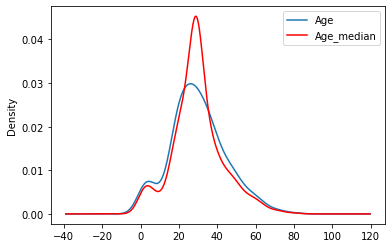

In [246]:
# we can see that the distribution has changed slightly with now more values accumulating towards the median
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Age'].plot(kind='kde', ax=ax)
X_train.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

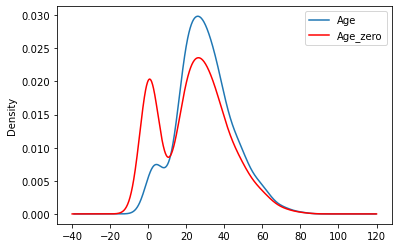

In [277]:
# filling NA with zeroes creates a peak of population around 0, as expected
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Age'].plot(kind='kde', ax=ax)
X_train.Age_zero.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Machine learning model performance on different imputation methods
# Logistic Regression

In [248]:
# Let's compare the performance of Logistic Regression using Age filled with zeros or alternatively the median

# model on NA imputed with zeroes
logit = LogisticRegression(random_state=44, C=1000) # c big to avoid regularization
logit.fit(X_train[['Age_zero', 'Fare']], y_train)
print('Train set zero imputation')
pred = logit.predict_proba(X_train[['Age_zero', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set zero imputation')
pred = logit.predict_proba(X_test[['Age_zero', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
print()

# model on NA imputed with median
logit = LogisticRegression(random_state=44, C=1000) # c big to avoid regularization
logit.fit(X_train[['Age_median', 'Fare']], y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train[['Age_median', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set median imputation')
pred = logit.predict_proba(X_test[['Age_median', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set zero imputation
Logistic Regression roc-auc: 0.6863354374091668
Test set zero imputation
Logistic Regression roc-auc: 0.71375

Train set median imputation
Logistic Regression roc-auc: 0.6794863451985858
Test set median imputation
Logistic Regression roc-auc: 0.7244940476190477


In [249]:
print('Average total survival:', X_train.Survived.mean())

Average total survival: 0.3884430176565008


In [250]:
print('Average real survival of children: ', X_train[X_train.Age<15].Survived.mean())
print('Average survival of children when using Age imputed with zeroes: ', X_train[X_train.Age_zero<15].Survived.mean())
print('Average survival of children when using Age imputed with median: ', X_train[X_train.Age_median<15].Survived.mean())

Average real survival of children:  0.5740740740740741
Average survival of children when using Age imputed with zeroes:  0.38857142857142857
Average survival of children when using Age imputed with median:  0.5740740740740741


In [256]:
X_train.Age_zero

857    51.0
52     49.0
386     1.0
124    54.0
578     0.0
       ... 
835    39.0
192    19.0
629     0.0
559    36.0
684    60.0
Name: Age_zero, Length: 623, dtype: float64

# SVM

In [257]:
# Let's compare the performance of SVM using Age filled with zeros or alternatively the median

SVM_model = SVC(random_state=44, probability=True, max_iter=-1, kernel='linear',)
SVM_model.fit(X_train[['Age_zero', 'Fare']], y_train)
print('Train set zero imputation')
pred = SVM_model.predict_proba(X_train[['Age_zero', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set zero imputation')
pred = SVM_model.predict_proba(X_test[['Age_zero', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
print()
SVM_model = SVC(random_state=44, probability=True,  max_iter=-1, kernel='linear')
SVM_model.fit(X_train[['Age_median', 'Fare']], y_train)
print('Train set median imputation')
pred = SVM_model.predict_proba(X_train[['Age_median', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set median imputation')
pred = SVM_model.predict_proba(X_test[['Age_median', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
print()


Train set zero imputation
Logistic Regression roc-auc: 0.6879514544153056
Test set zero imputation
Logistic Regression roc-auc: 0.7243452380952381

Train set median imputation
Logistic Regression roc-auc: 0.6931248779852932
Test set median imputation
Logistic Regression roc-auc: 0.7417559523809524



# Random Forest

In [258]:
# Let's compare the performance of Random Forests using Age filled with zeros or alternatively the median

rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf.fit(X_train[['Age_zero', 'Fare']], y_train)
print('Train set zero imputation')
pred = rf.predict_proba(X_train[['Age_zero', 'Fare']])
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set zero imputation')
pred = rf.predict_proba(X_test[['Age_zero', 'Fare']])
print('Random Forests zero imputation roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
print()
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf.fit(X_train[['Age_median', 'Fare']], y_train)
print('Train set median imputation')
pred = rf.predict_proba(X_train[['Age_median', 'Fare']])
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set median imputation')
pred = rf.predict_proba(X_test[['Age_median', 'Fare']])
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
print()


Train set zero imputation
Random Forests roc-auc: 0.7555855621353116
Test set zero imputation
Random Forests zero imputation roc-auc: 0.7490476190476191

Train set median imputation
Random Forests roc-auc: 0.7515021366130887
Test set median imputation
Random Forests roc-auc: 0.7697619047619049



# missing Values

In [284]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [285]:
# let's load the titanic dataset
data = pd.read_csv(r'C:\Users\dhruv\Desktop\DataSet HighRadius\Titanic.csv')

# let's inspect the first 5 rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [286]:

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [287]:
# alternatively, we can use the mean method after isnull
# to visualise the percentage of
# missing values for each variable

data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

# Mechanisms of Missing Data
# Missing data Not At Random (MNAR): Systematic missing values
# In the Titanic dataset, both the missing values of the variables Cabin and Age, were introduced systematically. For many of the # people who did not survive, the age they had or the cabin they were traveling in, could not be established. The people who #survived could be otherwise asked for that information.

# Can we infer this by looking at the data?

# In a situation like this, we could expect a greater number of missing values for people who did not survive.

# Let's have a look.

In [288]:
# let's create a binary variable that indicates 
# whether the value of cabin is missing

data['cabin_null'] = np.where(data.Cabin.isnull(), 1, 0)

In [293]:
data[['Cabin','cabin_null']]

,Cabin,cabin_null
0,NaN,1
1,C85,0
2,NaN,1
3,C123,0
4,NaN,1
...,...,...
886,NaN,1
887,B42,0
888,NaN,1
889,C148,0


In [294]:
# let's evaluate the percentage of missing values in
# cabin for the people who survived vs the non-survivors.

# the variable Survived takes the value 1 if the passenger
# survived, or 0 otherwise

# group data by Survived vs Non-Survived
# and find the percentage of nulls for cabin
data.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [295]:
# another way of doing the above, with less lines of code

data['Cabin'].isnull().groupby(data['Survived']).mean()

Survived
0    0.876138
1    0.602339
Name: Cabin, dtype: float64

# We observe that the percentage of missing values is higher for people who did not survive (87%), respect to people who survived (60%). This finding is aligned with our hypothesis that the data is missing because after people died, the information could not be retrieved.

# Note: Having said this, to truly underpin whether the data is missing not at random, we would need to get extremely familiar with the way data was collected. Analysing datasets, can only point us in the right direction or help us build assumptions.

In [296]:
# Let's do the same for the variable age:

# First we create a binary variable to indicates
# whether the value of Age is missing

data['age_null'] = np.where(data.Age.isnull(), 1, 0)

# and then look at the mean in the different survival groups:
data.groupby(['Survived'])['age_null'].mean()

Survived
0    0.227687
1    0.152047
Name: age_null, dtype: float64

In [297]:
# another way of doing the above

data['Age'].isnull().groupby(data['Survived']).mean()

Survived
0    0.227687
1    0.152047
Name: Age, dtype: float64

# Again, we observe a higher number of missing data for the people who did not survive the tragedy. The analysis therefore suggests that there is a systematic loss of data: people who did not survive tend to have more missing information. Presumably, the method chosen to gather the information, contributes to the generation of these missing data.

## Missing data Completely At Random (MCAR)

In [298]:
# In the titanic dataset, there are also missing values
# for the variable Embarked.
# Let's have a look.

# Let's slice the dataframe to show only the observations
# with missing values for Embarked

data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,age_null
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,0


In [300]:
# let's load the columns of interest from the
# Lending Club loan book dataset

##########################################
# Note: newer versions of pandas automatically cast strings as NA,
# so to follow along with the notebook load the data as below if using
# the latest pandas version. Loading method may need to be adjusted if
# using older versions of pandas
##########################################

data = pd.read_csv(r'C:\Users\dhruv\Desktop\DataSet HighRadius\loan.csv',
                   usecols=['emp_title', 'emp_length'],
                   na_values='',
                   keep_default_na=False)

In [302]:
data.head()

,emp_title,emp_length
0,Chef,10+ years
1,Postmaster,10+ years
2,Administrative,6 years
3,IT Supervisor,10+ years
4,Mechanic,10+ years


In [306]:
data.isnull().mean()

emp_title     0.073841
emp_length    0.000000
dtype: float64

In [310]:
# let's insptect the different employer names

# number of different employers names
print('Number of different employer names: {}'.format(
    len(data.emp_title.unique())))

# a few examples of employers names
data.emp_title.unique()[0:20]

Number of different employer names: 512698


array(['Chef', 'Postmaster ', 'Administrative', 'IT Supervisor',
       'Mechanic', 'Director COE', 'Account Manager',
       'Assistant Director', 'Legal Assistant III', nan, 'Consultant',
       'Job Coach Supervisor', 'Quality Field Engineer', 'Teller ',
       'respritory therapist', 'Worship Director', 'Processor ',
       'Neonatal Nurse Practitioner', 'Stationary Engineer',
       'Exhibits director'], dtype=object)

In [311]:
# let's inspect the variable emp_length
data.emp_length.unique()

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', 'n/a', '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

# The value 'n/a', "not applicable" is the one we are interested in. The customer can't enter an employment length, perhaps because they are not employed. They could be students, retired, self-employed, or work in the house.

In [312]:
# let's look at the percentage of borrowers within
# each label / category of emp_length variable

# value counts counts the observations per category
# if we divide by the number of observations (len(data))
# we obtain the percentages of observations per category

data.emp_length.value_counts() / len(data)

10+ years    0.330878
2 years      0.090096
< 1 year     0.084041
3 years      0.079956
1 year       0.065646
n/a          0.064984
5 years      0.061795
4 years      0.060427
6 years      0.045397
7 years      0.041003
8 years      0.040658
9 years      0.035120
Name: emp_length, dtype: float64

In [315]:
# the variable emp_length has many categories.
# I will summarise it into 3 for simplicity:
# '0-10 years' or '10+ years' or 'n/a'

# let's build a dictionary to re-map emp_length to just 3 categories:

length_dict = {k: '0-10 years' for k in data.emp_length.unique()}
length_dict['10+ years'] = '10+ years'
length_dict['n/a'] = 'n/a'

# let's look at the dictionary
length_dict

{'10+ years': '10+ years',
 '6 years': '0-10 years',
 '4 years': '0-10 years',
 '< 1 year': '0-10 years',
 '2 years': '0-10 years',
 '9 years': '0-10 years',
 'n/a': 'n/a',
 '5 years': '0-10 years',
 '3 years': '0-10 years',
 '7 years': '0-10 years',
 '1 year': '0-10 years',
 '8 years': '0-10 years'}

In [316]:
# let's re-map the emp_length variable

data['emp_length_redefined'] = data.emp_length.map(length_dict)

# let's see if it worked
data.emp_length_redefined.unique()

array(['10+ years', '0-10 years', 'n/a'], dtype=object)

In [317]:
data

,emp_title,emp_length,emp_length_redefined
0,Chef,10+ years,10+ years
1,Postmaster,10+ years,10+ years
2,Administrative,6 years,0-10 years
3,IT Supervisor,10+ years,10+ years
4,Mechanic,10+ years,10+ years
...,...,...,...
2260663,house keeper,10+ years,10+ years
2260664,Skilled Labor,< 1 year,0-10 years
2260665,Teacher,10+ years,10+ years
2260666,NaN,n/a,n/a


In [318]:
# let's calculate the proportion of working years
# with the same employer for those who miss data on emp_title

# data[data.emp_title.isnull()] represents the observations
# with missing data in emp_title. I use this below:

# Calculations:
# number of borrowers for whom employer name is missing
# aka, not employed people
not_employed = len(data[data.emp_title.isnull()])

# % of borrowers for whom employer name is missing
# within each category of employment length

data[data.emp_title.isnull()].groupby(
    ['emp_length_redefined'])['emp_length'].count().sort_values() / not_employed

emp_length_redefined
10+ years     0.021069
0-10 years    0.103678
n/a           0.875254
Name: emp_length, dtype: float64

In [319]:
# let's do the same for those bororwers who reported
# the employer name

# number of borrowers for whom employer name is present:
# employed people
employed = len(data.dropna(subset=['emp_title']))

# % of borrowers within each category
data.dropna(subset=['emp_title']).groupby(
    ['emp_length_redefined'])['emp_length'].count().sort_values() / employed

emp_length_redefined
n/a           0.000382
10+ years     0.355579
0-10 years    0.644039
Name: emp_length, dtype: float64

In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [361]:
cancer = load_breast_cancer()

In [362]:
df = pd.DataFrame(cancer.data,columns=cancer.feature_names)

In [363]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# DataVisualization

In [334]:
# line Graph
import matplotlib.pyplot as plt
from matplotlib import style

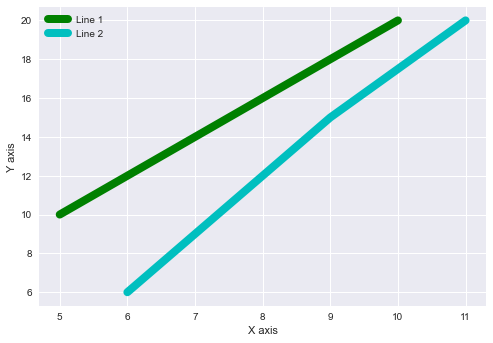

In [372]:
style.use('seaborn')
x=[5,8,10]
y=[10,16,20]
x2=[6,9,11]
y2=[6,15,20]
plt.plot(x,y,'g',label='Line 1',linewidth=8)
plt.plot(x2,y2,'c',label='Line 2',linewidth=8)
plt.ylabel('Y axis')
plt.xlabel('X axis')
plt.legend()
plt.show()

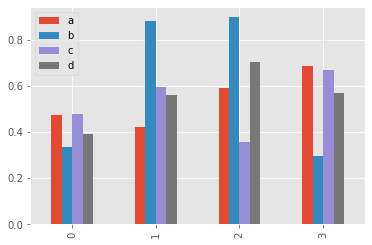

In [348]:
#Bar graph
df2 = pd.DataFrame(np.random.rand(4,4), columns=["a", "b", "c", "d"])

df2.plot.bar();

In [351]:
np.random.rand(10,2)

array([[0.66405356, 0.76827399],
       [0.62944613, 0.12286534],
       [0.10298402, 0.82582411],
       [0.03865719, 0.0822824 ],
       [0.76028086, 0.85921768],
       [0.69835832, 0.60198759],
       [0.38447854, 0.1209429 ],
       [0.49615814, 0.65986013],
       [0.13194513, 0.38534686],
       [0.46117869, 0.79743733]])

<Figure size 1008x1008 with 0 Axes>

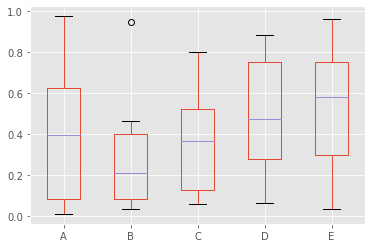

In [369]:
#boxplot
plt.figure(figsize=(14,14))
df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])
df.plot.box();

In [373]:
plt.figure(figsize=(14,14))
df['mean radius'].plot.box()

KeyError: 'mean radius'

<Figure size 1008x1008 with 0 Axes>

In [379]:
data = pd.read_csv(r'C:\Users\dhruv\Desktop\DataSet HighRadius\loan.csv',
                   usecols=['issue_d', 'last_pymnt_d'],nrows=10000)
data.head()

,issue_d,last_pymnt_d
0,Dec-2018,Feb-2019
1,Dec-2018,Feb-2019
2,Dec-2018,Feb-2019
3,Dec-2018,Feb-2019
4,Dec-2018,Feb-2019


In [383]:
data['issue_dt'] = pd.to_datetime(data.issue_d)
data['last_pymnt_dt'] = pd.to_datetime(data.last_pymnt_d)

data[['issue_d','issue_dt','last_pymnt_d', 'last_pymnt_dt']].head()

,issue_d,issue_dt,last_pymnt_d,last_pymnt_dt
0,Dec-2018,2018-12-01,Feb-2019,2019-02-01
1,Dec-2018,2018-12-01,Feb-2019,2019-02-01
2,Dec-2018,2018-12-01,Feb-2019,2019-02-01
3,Dec-2018,2018-12-01,Feb-2019,2019-02-01
4,Dec-2018,2018-12-01,Feb-2019,2019-02-01


In [384]:
# Extract quarter from date variable

data['issue_dt_quarter'] = data['issue_dt'].dt.quarter

data[['issue_dt', 'issue_dt_quarter']].head()

,issue_dt,issue_dt_quarter
0,2018-12-01,4
1,2018-12-01,4
2,2018-12-01,4
3,2018-12-01,4
4,2018-12-01,4


In [385]:
# We could also extract semester

data['issue_dt_semester'] = np.where(data.issue_dt_quarter.isin([1,2]),1,2)
data.head()

,issue_d,last_pymnt_d,issue_dt,last_pymnt_dt,issue_dt_quarter,issue_dt_semester
0,Dec-2018,Feb-2019,2018-12-01,2019-02-01,4,2
1,Dec-2018,Feb-2019,2018-12-01,2019-02-01,4,2
2,Dec-2018,Feb-2019,2018-12-01,2019-02-01,4,2
3,Dec-2018,Feb-2019,2018-12-01,2019-02-01,4,2
4,Dec-2018,Feb-2019,2018-12-01,2019-02-01,4,2


In [386]:
# day of the week - from 0 to 6

data['issue_dt_dayofweek'] = data['issue_dt'].dt.dayofweek

data[['issue_dt', 'issue_dt_dayofweek']].head()

,issue_dt,issue_dt_dayofweek
0,2018-12-01,5
1,2018-12-01,5
2,2018-12-01,5
3,2018-12-01,5
4,2018-12-01,5


In [394]:
# day of the week - name

data['issue_dt_dayofweek'] = data['issue_dt'].dt.day_name()

data[['issue_dt', 'issue_dt_dayofweek']].head()

,issue_dt,issue_dt_dayofweek
0,2018-12-01,Saturday
1,2018-12-01,Saturday
2,2018-12-01,Saturday
3,2018-12-01,Saturday
4,2018-12-01,Saturday


In [397]:
data['issue_dt'].dt.month

0       12
1       12
2       12
3       12
4       12
        ..
9995    12
9996    12
9997    12
9998    12
9999    12
Name: issue_dt, Length: 10000, dtype: int64

In [402]:
from datetime import date
today_date = date.today()
print('Weekday :',today_date.strftime('%A'))
print('Month :',today_date.strftime('%B'))
print('Week number :',today_date.strftime('%W'))
print("Locale's date and time representation :",today_date.strftime('%c'))

Weekday : Thursday
Month : June
Week number : 25
Locale's date and time representation : Thu Jun 24 00:00:00 2021


In [412]:
data.iloc[:4,:4]


,issue_d,last_pymnt_d,issue_dt,last_pymnt_dt
0,Dec-2018,Feb-2019,2018-12-01,2019-02-01
1,Dec-2018,Feb-2019,2018-12-01,2019-02-01
2,Dec-2018,Feb-2019,2018-12-01,2019-02-01
3,Dec-2018,Feb-2019,2018-12-01,2019-02-01


In [440]:
data.loc[data['issue_dt'].dt.month==12]

,issue_d,last_pymnt_d,issue_dt,last_pymnt_dt,issue_dt_quarter,issue_dt_semester,issue_dt_dayofweek
0,Dec-2018,Feb-2019,2018-12-01,2019-02-01,4,2,Saturday
1,Dec-2018,Feb-2019,2018-12-01,2019-02-01,4,2,Saturday
2,Dec-2018,Feb-2019,2018-12-01,2019-02-01,4,2,Saturday
3,Dec-2018,Feb-2019,2018-12-01,2019-02-01,4,2,Saturday
4,Dec-2018,Feb-2019,2018-12-01,2019-02-01,4,2,Saturday
...,...,...,...,...,...,...,...
9995,Dec-2018,Feb-2019,2018-12-01,2019-02-01,4,2,Saturday
9996,Dec-2018,Feb-2019,2018-12-01,2019-02-01,4,2,Saturday
9997,Dec-2018,Feb-2019,2018-12-01,2019-02-01,4,2,Saturday
9998,Dec-2018,Feb-2019,2018-12-01,2019-02-01,4,2,Saturday


In [1]:
friday = pd.Timestamp('2018-01-05')

print(friday.day_name())
# Add 1 day
saturday = friday + pd.Timedelta('1 day')
print(saturday.day_name())
# Add 1 business day (Friday --> Monday)
monday = friday + pd.offsets.BDay()
print(monday.day_name())
# subtract
print(monday- friday)

NameError: name 'pd' is not defined

In [7]:
X_train

NameError: name 'X_train' is not defined